<a href="https://colab.research.google.com/github/arghads9177/cnn-image-classification-fashion-mnist/blob/master/CNN_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification with Fashion-MNIST Dataset**

## Project Overview  
This project focuses on developing a robust image classification model using the **Fashion-MNIST dataset**, which is designed as a more challenging alternative to the classic MNIST dataset. The dataset contains grayscale images of various fashion items, categorized into 10 distinct classes.  

---

## About the Dataset  

### Dataset Description  
The **Fashion-MNIST dataset** consists of:  
- **Training Set:** 60,000 grayscale images (28x28 pixels).  
- **Test Set:** 10,000 grayscale images (28x28 pixels).  
- **Classes:** 10 fashion categories, completely mutually exclusive.  

Each image is labeled with one of the following 10 classes:  
| Label | Class Name         | Description                                   |
|-------|--------------------|-----------------------------------------------|
| 0     | T-shirt/top        | Upper-body garment without buttons or collar |
| 1     | Trouser            | Pants or slacks                              |
| 2     | Pullover           | Sweater or knitted garment                   |
| 3     | Dress              | One-piece garment                            |
| 4     | Coat               | Outerwear worn for warmth                    |
| 5     | Sandal             | Open-toe footwear                            |
| 6     | Shirt              | Upper-body garment with buttons              |
| 7     | Sneaker            | Sports shoes                                 |
| 8     | Bag                | Carrying accessory                           |
| 9     | Ankle boot         | Footwear covering the ankle                  |  

### Dataset Highlights  
- **Image Size:** 28x28 pixels in grayscale (1 channel).  
- **Structure:** Same training/testing splits as MNIST, making it a drop-in replacement.  
- **Challenge:** Unlike handwritten digits in MNIST, these fashion items have more intricate details and variability.  

---

## Objectives  

1. **Image Classification:**  
   - Develop a machine learning model to classify fashion items into their respective categories.  

2. **Evaluation:**  
   - Analyze the model's performance using standard classification metrics.  

3. **Comparison with MNIST:**  
   - Assess model performance on Fashion-MNIST vs. classic MNIST for benchmarking.  

4. **Insights:**  
   - Extract meaningful insights from the dataset to understand model predictions and misclassifications.  

---

## Methodology  

### 1. **Data Preprocessing**  
   - **Normalization:** Scale pixel values to the range [0, 1].  
   - **Augmentation:** Apply transformations like rotation, flipping, and zoom to increase data diversity.  

### 2. **Model Development**  
   - **Baseline Model:** Simple feedforward neural network.  
   - **Advanced Architectures:**  
      - Convolutional Neural Networks (CNNs) for feature extraction.  
      - Pre-trained models and transfer learning for improved accuracy.  

### 3. **Training and Optimization**  
   - Loss Function: **Categorical Cross-Entropy**  
   - Optimizers: **Adam**, **RMSprop**, or **SGD with momentum**  
   - Learning rate scheduling and dropout for regularization.  

### 4. **Evaluation**  
   - Metrics: Accuracy, Precision, Recall, F1-score.  
   - Tools: Confusion matrix and class-wise accuracy analysis.  

### 5. **Visualization**  
   - Visualize correctly and incorrectly classified images to understand model behavior.  

---

## Tools and Libraries  

- **Frameworks:** TensorFlow, Keras, PyTorch  
- **Data Handling:** NumPy, pandas  
- **Visualization:** Matplotlib, seaborn  
- **Environment:** Jupyter Notebook, Google Colab  

---

## Applications  

1. **Benchmarking Models:**  
   - Use Fashion-MNIST as a challenging alternative to MNIST for comparing algorithm performance.  

2. **Real-World Use Cases:**  
   - Apply trained models to classify e-commerce fashion items or recommend similar products.  

3. **Explainable AI:**  
   - Analyze model decisions and identify areas for improvement.  

---

## Dataset Information  

- **Name:** Fashion-MNIST Dataset  
- **Source:** [Fashion-MNIST on Kaggle](https://www.kaggle.com/zalando-research/fashionmnist)  
- **Size:** ~30 MB  

---

## Future Enhancements  

1. **Model Deployment:**  
   - Deploy the model using Flask or FastAPI for real-time predictions.  

2. **Explainability:**  
   - Leverage Grad-CAM or SHAP to visualize important features in predictions.  

3. **Integration with Applications:**  
   - Integrate the model with e-commerce platforms to enable visual search or category suggestions.  

---

## Conclusion  

The **Fashion-MNIST dataset** provides a modern, real-world alternative to MNIST for evaluating machine learning models. By tackling this challenging classification task, the project highlights advanced techniques in computer vision while demonstrating practical use cases for e-commerce and beyond.  



### Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

### Settings

In [ ]:
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

### Load Data

In [ ]:
# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [ ]:
# Data insights
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


### Preprocessing Images

In [ ]:

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape the dataset to add the channel dimension (for grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)  # Shape: (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # 10 classes (e.g., T-shirt, Trouser, etc.)
y_test = to_categorical(y_test, 10)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

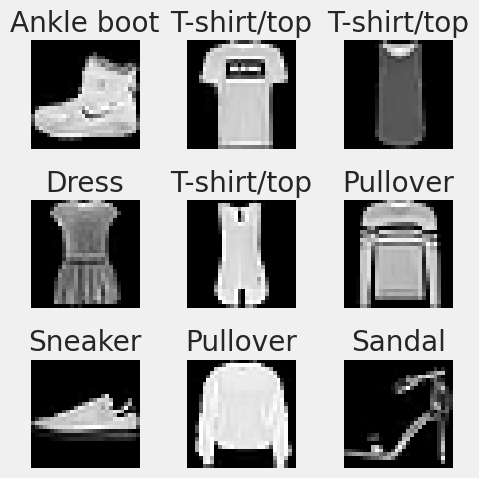

In [ ]:
# Display sample images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap="gray")  # Use .squeeze() to remove single channel
    plt.title(class_names[np.argmax(y_train[i])])  # Decode one-hot to class index
    plt.axis('off')
plt.tight_layout()
plt.show()

### Constructing the CNN Model

The key parameters for the model are,

- **Learning Rate:** 0.001
- **Optimizer:** Adam
- **Batch Size:**- ** 64
- **Activation Function:** ReLU
- **Loss Function:** Categorical Crossentropy

In [ ]:
# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps and add dense layers
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting
model.add(Dense(10, activation="softmax"))  # Output layer for 10 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training and Validation

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.6982 - loss: 0.8403 - val_accuracy: 0.8509 - val_loss: 0.4059
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.8455 - loss: 0.4273 - val_accuracy: 0.8731 - val_loss: 0.3462
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8678 - loss: 0.3664 - val_accuracy: 0.8786 - val_loss: 0.3318
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.8821 - loss: 0.3231 - val_accuracy: 0.8900 - val_loss: 0.2971
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.8908 - loss: 0.3023 - val_accuracy: 0.8989 - val_loss: 0.2769
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9025 - loss: 0.2679 - val_accuracy: 0.8990 - val_loss: 0.2677
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.9059 - loss: 0.2575 - val_accuracy: 0.9035 - val_loss: 0.2650
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9106 - loss: 0.2429 - 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9107 - loss: 0.2527
Test Accuracy: 91.16%


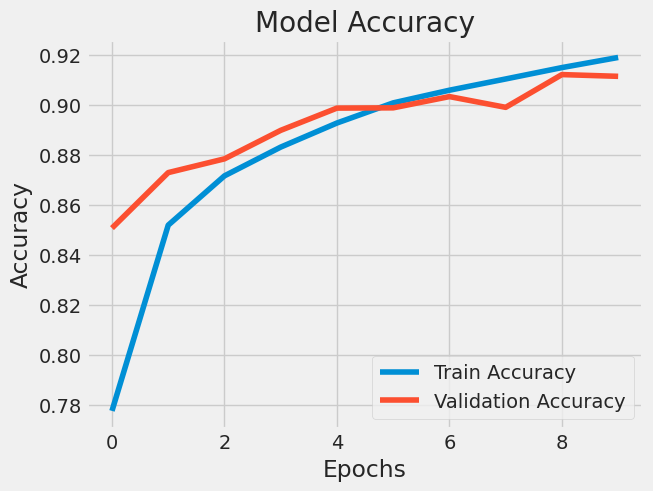

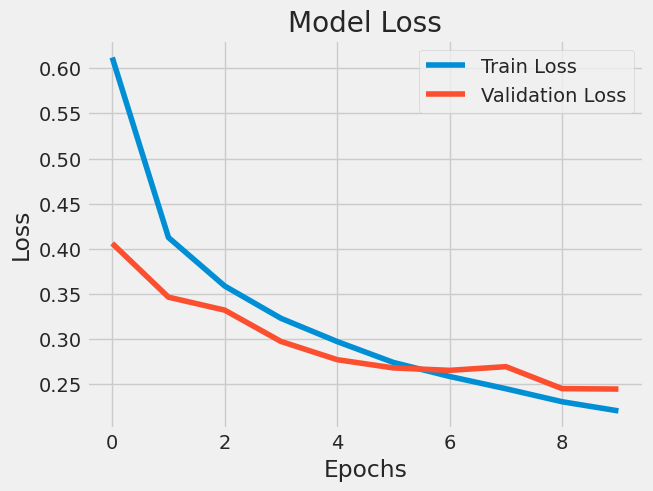

In [ ]:
# Plot accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


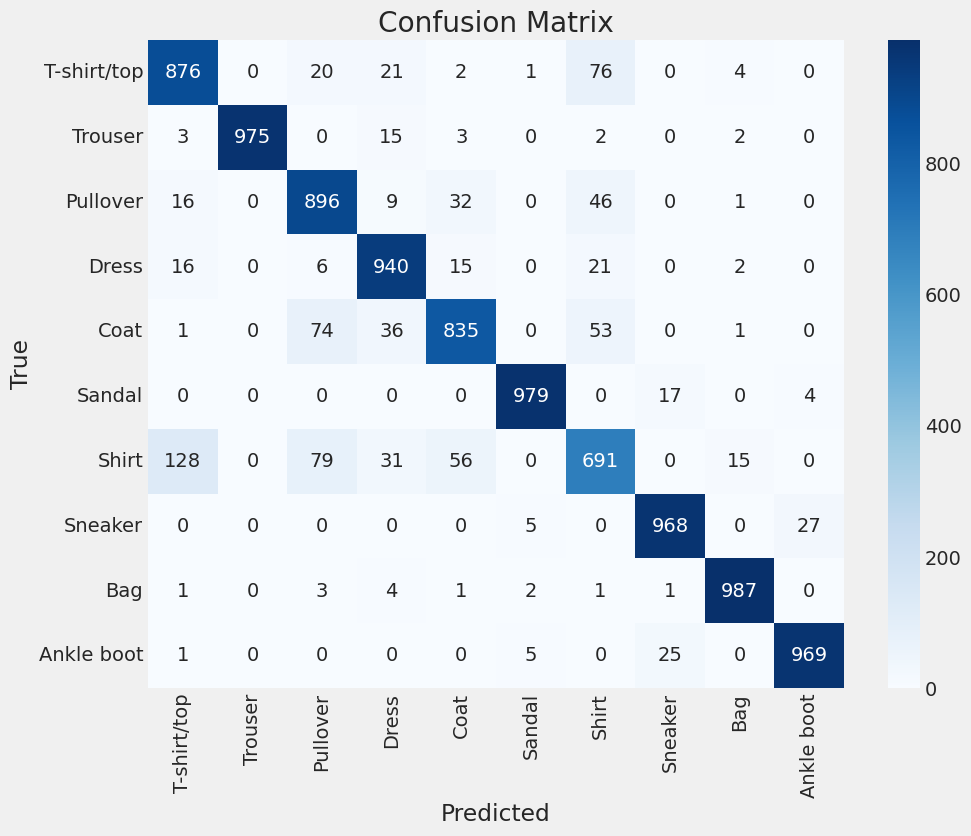

In [ ]:
# Generate confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.83      0.90      0.86      1000
       Dress       0.89      0.94      0.91      1000
        Coat       0.88      0.83      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.69      0.73      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000




## Interpretation and Insights

1. **Overall Performance**:
   - The CNN model achieves a high overall accuracy of **91%** on the Fashion-MNIST test set.
   - Both precision and recall are balanced, indicating consistent performance across most classes.

2. **Best Performing Classes**:
   - **Trouser**, **Sandal**, **Bag**, and **Ankle Boot** have near-perfect precision and recall scores (≥97%), demonstrating that the model effectively distinguishes these classes.
   - These items likely have unique visual features that the CNN identifies with ease.

3. **Challenging Classes**:
   - **Shirt** has the lowest F1-score (0.73), with precision (0.78) and recall (0.69) lagging behind other classes. This indicates difficulty in correctly classifying shirts, possibly due to visual similarity with other clothing items like T-shirts or coats.

4. **Class Imbalance**:
   - Since the Fashion-MNIST dataset is balanced with 1000 examples per class, the performance discrepancies arise from feature similarities rather than class imbalance.

---

## Potential Improvements

1. **Class-Specific Enhancements**:
   - Introduce additional preprocessing or augmentation techniques (e.g., random rotation, flipping) to diversify Shirt-like samples and improve model robustness.
   - Use attention-based mechanisms (e.g., Vision Transformers or Attention Layers) to focus on fine-grained details.

2. **Model Architecture**:
   - Experiment with deeper or pre-trained architectures like ResNet or EfficientNet to improve feature extraction and classification.
   - Apply transfer learning using pre-trained models on larger datasets like ImageNet.

3. **Hyperparameter Optimization**:
   - Fine-tune learning rates, batch sizes, and optimizer configurations to enhance training efficiency and accuracy.
   - Implement regularization techniques like Dropout or L2 regularization to reduce overfitting.

4. **Class-Specific Metrics**:
   - Analyze Shirt misclassifications further by examining confusion matrices to identify overlapping classes.

5. **Ensemble Methods**:
   - Combine predictions from multiple CNN architectures to improve classification robustness and reduce errors.

---

## Limitations

1. **Simple Architecture**:
   - While effective, the CNN model used might lack the capacity to handle highly overlapping features between some classes (e.g., Shirt vs. T-shirt).

2. **Dataset Constraints**:
   - The grayscale nature of Fashion-MNIST may limit the discriminative power of features compared to datasets with colored images.

3. **Real-World Generalization**:
   - The model's performance is specific to the Fashion-MNIST dataset. Real-world datasets may include more complex variations, requiring additional training and evaluation.

---

## Conclusion

The CNN model demonstrates strong performance on the Fashion-MNIST dataset, achieving high accuracy and balanced metrics across most classes. However, challenges remain for visually similar classes like Shirts. Future work should explore advanced architectures, fine-tuning, and better feature extraction methods to further improve classification performance.






